# VacationPy - solution
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Import API key
from api_keys import weather_api_key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv('../output_data/cities.csv')

# Display sample data
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...,...
572,572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565
575,575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

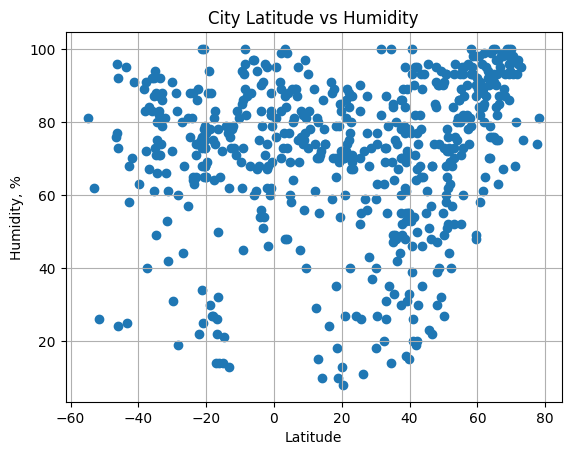

In [3]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity, %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("CityLatVSHumidity.png")

# Display the map
# YOUR CODE HERE
plt.show()


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [ ]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

In [4]:
city_data_df = city_data_df.dropna(how='any')
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...,...
572,572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565
575,575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566


In [5]:
city_data_ideal_df = city_data_df[(city_data_df["Cloudiness"] == 0)]
city_data_ideal_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
32,32,cape town,-33.9258,18.4232,20.61,71,0,9.26,ZA,1666108250
44,44,collierville,35.0420,-89.6645,7.11,47,0,5.66,US,1666108151
...,...,...,...,...,...,...,...,...,...,...
542,542,bilma,18.6853,12.9164,31.90,18,0,4.17,NE,1666108548
546,546,arcata,40.8665,-124.0828,10.66,93,0,1.54,US,1666108260
550,550,pali,25.7667,73.3333,27.18,26,0,1.38,IN,1666108552
559,559,lompoc,34.6391,-120.4579,17.55,100,0,3.60,US,1666108556


In [6]:
city_data_ideal_df = city_data_ideal_df[(city_data_ideal_df["Humidity"] >= 52) & 
                                        (city_data_ideal_df["Humidity"] <= 100)]
city_data_ideal_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
32,32,cape town,-33.9258,18.4232,20.61,71,0,9.26,ZA,1666108250
45,45,kapaa,22.0752,-159.3190,22.99,84,0,3.60,US,1666108257
51,51,hilo,19.7297,-155.0900,26.27,83,0,2.57,US,1666108260
63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
82,82,qostanay,53.1667,63.5833,3.16,70,0,6.00,KZ,1666108282
83,83,esperance,-33.8667,121.9000,11.24,87,0,4.56,AU,1666108282


In [7]:
city_data_ideal_df = city_data_ideal_df[(city_data_ideal_df["Wind Speed"] >= .25) & 
                                        (city_data_ideal_df["Wind Speed"] < 4)]
city_data_ideal_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
45,45,kapaa,22.0752,-159.3190,22.99,84,0,3.60,US,1666108257
51,51,hilo,19.7297,-155.0900,26.27,83,0,2.57,US,1666108260
63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
121,121,lichuan,30.3000,108.8500,9.72,77,0,1.10,CN,1666108308
152,152,kahului,20.8947,-156.4700,23.80,60,0,3.09,US,1666108246
159,159,geraldton,-28.7667,114.6000,13.23,88,0,2.57,AU,1666108332
197,197,gat,31.6100,34.7642,24.38,100,0,3.69,IL,1666108356
211,211,laguna,38.4210,-121.4238,21.67,79,0,2.06,US,1666108364
240,240,tikaitnagar,26.9500,81.5833,23.56,59,0,0.35,IN,1666108378


In [8]:
city_data_ideal_df = city_data_ideal_df[(city_data_ideal_df["Max Temp"] >= 21) & (city_data_ideal_df["Max Temp"] < 25)]
city_data_ideal_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
45,45,kapaa,22.0752,-159.3190,22.99,84,0,3.60,US,1666108257
63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
152,152,kahului,20.8947,-156.4700,23.80,60,0,3.09,US,1666108246
197,197,gat,31.6100,34.7642,24.38,100,0,3.69,IL,1666108356
211,211,laguna,38.4210,-121.4238,21.67,79,0,2.06,US,1666108364
240,240,tikaitnagar,26.9500,81.5833,23.56,59,0,0.35,IN,1666108378
265,265,san quintin,30.4833,-115.9500,21.20,74,0,1.37,MX,1666108394
340,340,santa rosalia,27.3167,-112.2833,24.62,56,0,0.74,MX,1666108436
363,363,narwar,25.6500,77.9000,22.35,55,0,1.29,IN,1666108449


### Step 3: Create a new DataFrame called `hotel_df`.

In [ ]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

In [9]:
hotel_df = city_data_ideal_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']]
hotel_df['Hotel'] = ''
hotel_df

/var/folders/jj/32_dqrr12sg5q8_ykvw5s5cr0000gn/T/ipykernel_97017/494986555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['Hotel'] = ''


,City,Country,Lat,Lng,Humidity,Hotel
45,kapaa,US,22.0752,-159.3190,84,
63,banda,IN,25.4833,80.3333,52,
81,makakilo city,US,21.3469,-158.0858,81,
152,kahului,US,20.8947,-156.4700,60,
197,gat,IL,31.6100,34.7642,100,
211,laguna,US,38.4210,-121.4238,79,
240,tikaitnagar,IN,26.9500,81.5833,59,
265,san quintin,MX,30.4833,-115.9500,74,
340,santa rosalia,MX,27.3167,-112.2833,56,
363,narwar,IN,25.6500,77.9000,55,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [10]:
# Set parameters to search for a hotel
categories = "accommodation.hotel"
radius = 10000
params = {"categories":"accommodation.hotel",
    "apiKey":geoapify_key,
    "limit":1
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search


/var/folders/jj/32_dqrr12sg5q8_ykvw5s5cr0000gn/T/ipykernel_97017/2756397957.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
/var/folders/jj/32_dqrr12sg5q8_ykvw5s5cr0000gn/T/ipykernel_97017/2756397957.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pono Kai Resort' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]


kapaa - nearest hotel: Pono Kai Resort
banda - nearest hotel: #acnindiafy21
makakilo city - nearest hotel: Embassy Suites by Hilton Oahu Kapolei
kahului - nearest hotel: Maui Seaside Hotel
gat - nearest hotel: No hotel found
laguna - nearest hotel: Holiday Inn Express & Suites
tikaitnagar - nearest hotel: No hotel found
san quintin - nearest hotel: Jardines Hotel
santa rosalia - nearest hotel: Sol y Mar
narwar - nearest hotel: No hotel found
port hedland - nearest hotel: The Esplanade Hotel
roebourne - nearest hotel: No hotel found
capoterra - nearest hotel: Rosa Hotel
stolac - nearest hotel: Bregava
guerrero negro - nearest hotel: Plaza sal paraiso


,City,Country,Lat,Lng,Humidity,Hotel,Hotel Name
45,kapaa,US,22.0752,-159.3190,84,,Pono Kai Resort
63,banda,IN,25.4833,80.3333,52,,#acnindiafy21
81,makakilo city,US,21.3469,-158.0858,81,,Embassy Suites by Hilton Oahu Kapolei
152,kahului,US,20.8947,-156.4700,60,,Maui Seaside Hotel
197,gat,IL,31.6100,34.7642,100,,No hotel found
211,laguna,US,38.4210,-121.4238,79,,Holiday Inn Express & Suites
240,tikaitnagar,IN,26.9500,81.5833,59,,No hotel found
265,san quintin,MX,30.4833,-115.9500,74,,Jardines Hotel
340,santa rosalia,MX,27.3167,-112.2833,56,,Sol y Mar
363,narwar,IN,25.6500,77.9000,55,,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [11]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

In [14]:
map_plot = hotel_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM"
)

# Display the map plot_1
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]